<a href="https://colab.research.google.com/github/arnav-jain25/Mini_Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
#IMAGE CLASSIFICATION(Guitars AND Harps)

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/ML - Internship(Smartknower)/Image_Dataset/Guitars
/content/drive/MyDrive/ML - Internship(Smartknower)/Image_Dataset/Harps


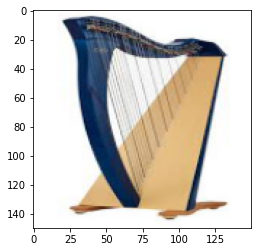

In [110]:
#DATA GATHERING AND PREPROCESSING
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize


Data = '/content/drive/MyDrive/ML - Internship(Smartknower)/Image_Dataset'
Category=['Guitars','Harps']

images = []
target =[]
flat_data =[]
for i in Category :
  path = os.path.join(Data,i)
  print(path)
  for img in os.listdir(path) :
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) #Normalizing by resizing all images
    flat_data.append(img_resized.flatten()) #Flattening of Data
    images.append(img_resized)
    target.append(i)

plt.imshow(img_resized)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [133]:
#SPLITING OF IMAGE_DATASET
X_train, X_test, y_train, y_test = train_test_split(
    flat_data, target, train_size=0.75, test_size=0.25,random_state=71)

In [134]:
#DATA TRAINING
parameter_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, parameter_grid)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_train)
clf.score(X_train, y_train)

1.0

In [135]:
#OUTPUT PREDICTION
y_pred = clf.predict(X_test)

In [136]:
#ACCURACY
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(y_pred,y_test)*100
score

80.0

In [137]:
#CONFUSION MATRIX
import seaborn as sns 

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 6  4]
 [ 1 14]]


Text(0.5, 1.0, 'Accuracy Score: 80.0')

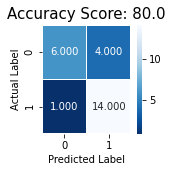

In [138]:
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [139]:
#CLASSIFICATION REPORT
print(classification_report(y_pred,y_test))
#print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

     Guitars       0.60      0.86      0.71         7
       Harps       0.93      0.78      0.85        18

    accuracy                           0.80        25
   macro avg       0.77      0.82      0.78        25
weighted avg       0.84      0.80      0.81        25

